In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 라이브러리
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 행, 열 출력 옵션
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
# pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

In [30]:
data = pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean_v1.feather')

In [31]:
df = data.copy()

In [32]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,loan_status_N,state
0,1077501,5000,5000,4975.0,36,0.1065,162.869995,B,B2,NaN,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,AZ
1,1077430,2500,2500,2500.0,60,0.1527,59.830002,C,C4,Ryder,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0,GA
2,1077175,2400,2400,2400.0,36,0.1596,84.330002,C,C5,NaN,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,IL
3,1076863,10000,10000,10000.0,36,0.1349,339.309998,C,C1,AIR RESOURCES BOARD,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,CA
4,1075358,3000,3000,3000.0,60,0.1269,67.790001,B,B5,University Medical Group,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925487,102556443,24000,24000,24000.0,60,0.2399,690.299988,E,E2,Senior Escrow Officer,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0,CO
2925488,102653304,10000,10000,10000.0,36,0.0799,313.320007,A,A5,Rn,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,PA
2925489,102628603,10050,10050,10050.0,36,0.1699,358.260010,D,D1,Sales Associate,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0,VA
2925490,102196576,6000,6000,6000.0,36,0.1144,197.690002,B,B4,Contact input,...,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1,NY


# 1차 필터링 변수

In [33]:
# 1차 필터링 변수
filtered_cols = """
loan_amnt
funded_amnt
term
int_rate
installment
emp_length
home_ownership
annual_inc
verification_status
issue_d
purpose
dti
delinq_2yrs
earliest_cr_line
fico_range_high
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
all_util
inq_fi
total_cu_tl
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mort_acc
num_accts_ever_120_pd
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
total_rev_hi_lim
collections_12_mths_ex_med
chargeoff_within_12_mths
pub_rec_bankruptcies
tax_liens
"""

cols = filtered_cols.split()


In [34]:
cols

['loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_rev_hi_lim',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [35]:
# 1차 필터링 변수 + 타겟 데이터
df = pd.concat([df[cols], df['loan_status_N']], axis = 1)
df_target = df.copy()

In [36]:
target = 'loan_status_N'

# iv 계산 함수

* IV(Information Value)는 피처 선택 과정에서 피처의 예측력을 평가하는 데 사용되는 통계적 측정값
* 신용 점수 모델링과 같은 이진 분류 문제에서 중요한 피처를 선택하는 데 자주 사용
* IV는 각 피처가 타깃 변수와 얼마나 잘 구분되는지를 평가
* IV=∑(Good−Bad)×WOE
* WOE=ln(Good/Bad)

    * IV < 0.02: 매우 낮은 예측력 (Very Weak Predictive Power)
    * 0.02 ≤ IV < 0.1: 약한 예측력 (Weak Predictive Power)
    * 0.1 ≤ IV < 0.3: 중간 예측력 (Medium Predictive Power)
    * 0.3 ≤ IV < 0.5: 강한 예측력 (Strong Predictive Power)
    * IV ≥ 0.5: 매우 강한 예측력 (Very Strong Predictive Power)

In [14]:
import numpy as np
import pandas as pd

def calculate_iv(df, target):

    # 숫자형/범주형 데이터 분리
    numeric_df = df.select_dtypes(include=['number'])
    categorical_df = df.select_dtypes(include=['category', 'object'])
    result_df = pd.DataFrame()

    num_cols = numeric_df.columns
    cat_cols = categorical_df.columns
    if target in num_cols:
        num_cols = num_cols.drop(target)
    if target in cat_cols:
        cat_cols = cat_cols.drop(target)

    # 숫자형 변수 처리
    for col in num_cols:
        qcut_labels, bins = pd.qcut(numeric_df[col], 10, retbins=True, labels=False, duplicates='drop')

        # 구간의 시작점과 끝점 추출
        bin_ranges = pd.cut(numeric_df[col], bins=bins, include_lowest=True)

        # 구간별 데이터 개수 및 good_cnt, bad_cnt 계산
        bin_counts = bin_ranges.value_counts().sort_index().reset_index()
        bin_counts = bin_counts.rename(columns={bin_counts.columns[0]: 'bins', bin_counts.columns[1]: 'count'})

        # good_cnt와 bad_cnt 계산
        good_bad_counts = df.groupby(bin_ranges, observed=True)[target].agg(
            good_cnt=lambda x: (x == 1).sum(),
            bad_cnt=lambda x: (x == 0).sum()
        ).reset_index(drop=True)

        # 결과 데이터프레임에 병합
        bin_counts.insert(0, 'column_id', col)
        bin_counts = pd.concat([bin_counts, good_bad_counts], axis=1)

        result_df = pd.concat([result_df, bin_counts])
        result_df.reset_index(drop=True, inplace=True)

    # 범주형 변수 처리
    for col in cat_cols:
        # 범주별 데이터 개수 및 good_cnt, bad_cnt 계산
        bin_counts = df[col].value_counts().sort_index().reset_index()
        bin_counts = bin_counts.rename(columns={bin_counts.columns[0]: 'bins', bin_counts.columns[1]: 'count'})

        # good_cnt와 bad_cnt 계산
        good_bad_counts = df.groupby(col, observed=True)[target].agg(
            good_cnt=lambda x: (x == 1).sum(),
            bad_cnt=lambda x: (x == 0).sum()
        ).reset_index(drop=True)

        # 결과 데이터프레임에 병합
        bin_counts.insert(0, 'column_id', col)
        bin_counts = pd.concat([bin_counts, good_bad_counts], axis=1)

        result_df = pd.concat([result_df, bin_counts])
        result_df.reset_index(drop=True, inplace=True)

    # 추가 계산
    # good/bad_ratio는 전체 중 각 구간의 good/bad 비율
    # good/bad_percent는 good/bad 중에 각 구간의 good/bad 비율
    result_df['bins_percent'] = result_df['count'] / len(df)
    result_df['good_ratio'] = result_df['good_cnt'] / result_df['count']
    result_df['bad_ratio'] = result_df['bad_cnt'] / result_df['count']
    good = len(df[df[target] == 1])
    bad = len(df[df[target] == 0])
    result_df['good_percent'] = result_df['good_cnt'] / good
    result_df['bad_percent'] = result_df['bad_cnt'] / bad

    # IV 값 계산
    result_df['WoE'] = np.log((result_df['good_percent'] + 1e-3) / (result_df['bad_percent'] + 1e-3))
    result_df['iv'] = result_df['WoE'] * (result_df['good_percent'] - result_df['bad_percent'])
    sum_iv = result_df.groupby(['column_id'])['iv'].sum().reset_index().rename(columns={'iv': 'total_iv'})
    df_iv = pd.merge(result_df, sum_iv, on='column_id', how='left')

    return df_iv

In [15]:
df_iv = calculate_iv(df, 'loan_status_N')
df_iv

,column_id,bins,count,good_cnt,bad_cnt,bins_percent,good_ratio,bad_ratio,good_percent,bad_percent,WoE,iv,total_iv
0,loan_amnt,"(499.999, 4800.0]",183323,156502,26821,0.101520,0.853695,0.146305,0.108379,0.074141,0.375446,0.012854,0.041848
1,loan_amnt,"(4800.0, 6400.0]",181121,151885,29236,0.100301,0.838583,0.161417,0.105181,0.080817,0.260663,0.006351,0.041848
2,loan_amnt,"(6400.0, 8500.0]",180690,151064,29626,0.100062,0.836040,0.163960,0.104613,0.081895,0.242204,0.005502,0.041848
3,loan_amnt,"(8500.0, 10000.0]",211022,170566,40456,0.116859,0.808285,0.191715,0.118118,0.111833,0.054211,0.000341,0.041848
4,loan_amnt,"(10000.0, 12000.0]",168769,134318,34451,0.093460,0.795869,0.204131,0.093016,0.095233,-0.023305,0.000052,0.041848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,purpose,small_business,20035,14230,5805,0.011095,0.710257,0.289743,0.009854,0.016047,-0.451392,0.002795,0.014683
360,purpose,vacation,13031,10654,2377,0.007216,0.817589,0.182411,0.007378,0.006571,0.101315,0.000082,0.014683
361,purpose,wedding,2297,2017,280,0.001272,0.878102,0.121898,0.001397,0.000774,0.300890,0.000187,0.014683
362,initial_list_status,f,655770,529426,126344,0.363150,0.807335,0.192665,0.366631,0.349253,0.048425,0.000842,0.001311


In [16]:
iv = df_iv.sort_values(by='total_iv', ascending=False).loc[:,['column_id','total_iv']].drop_duplicates(subset='column_id', keep='first').reset_index(drop=True)
iv

,column_id,total_iv
0,int_rate,0.416364
1,fico_range_high,0.101604
2,dti,0.048847
3,num_tl_op_past_12m,0.043925
4,funded_amnt,0.041883
5,loan_amnt,0.041848
6,tot_hi_cred_lim,0.039334
7,installment,0.038865
8,verification_status,0.038410
9,mort_acc,0.037029


# SelectKBest 추출함수

*   f_classif는 타깃 값에 따른 분산을 비교하여 피처와 타깃 변수 간의 관계평가
*   ANOVA F-검정을 사용하여 각 피처의 F-값과 p-값을 계산
* p-값이 작을수록 유의미한 피처로 간주하며,타깃 변수와 강한 관계가 있음을 의미

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


def select_features(df, target):

    # 결측값이 있는 컬럼 제거
    df = df.dropna(axis=1)

    # X와 y 정의
    X = df.drop(columns=[target])
    y = df[target]

    # 날짜형 데이터를 숫자형으로 변환(일)
    for column in X.select_dtypes(include=[np.datetime64]).columns:
        if pd.api.types.is_datetime64_any_dtype(X[column]):
            X[column] = X[column].dt.day

    # 범주형 데이터를 숫자형으로 변환
    label_encoders = {}
    for column in X.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

    # SelectKBest를 사용한 Univariate Feature Selection
    # 각 피처의 F-값(F-statistic)
    selector = SelectKBest(score_func=f_classif, k='all')
    X_new = selector.fit_transform(X, y)

    # 선택된 피처의 점수와 이름을 가져옴
    scores = selector.scores_
    features = X.columns

    # 점수와 피처 이름을 함께 정렬
    features_scores = sorted(zip(features, scores), key=lambda x: x[1], reverse=True)

    # 점수 순으로 정렬된 피처의 이름과 점수 출력
    column_id = [feature for feature, score in features_scores]
    sorted_scores = [score for feature, score in features_scores]

    return column_id, sorted_scores

In [18]:
column_id, sorted_scores = select_features(df, 'loan_status_N')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 9 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [19]:
selected = pd.DataFrame({'column_id': column_id, 'sorted_scores':sorted_scores})
selected
# NaN 값이 발생하는 이유는 f_classif 점수를 계산할 때, 특정 피처가 상수(모두 동일값)거나 분산이 0인 경우
# 아래에서 NaN값은 datetime이라 그런 것

,column_id,sorted_scores
0,int_rate,124065.104358
1,term,54064.038842
2,issue_d,NaN
3,earliest_cr_line,NaN
4,fico_range_high,27019.412241
5,dti,14411.862936
6,num_tl_op_past_12m,13108.694332
7,verification_status,10608.732241
8,funded_amnt,9766.439644
9,loan_amnt,9754.969395


In [92]:
# selectKbest와 iv 순서가 거의 유사한 듯 함
# term은 수치형이지만, 성격상 범주형이기 떄문에 total_iv가 0이 나온 것 같음 -> 범주형 추출할 때 다시 해볼 것!
pd.merge(selected, iv, on='column_id', how='left')

,column_id,sorted_scores,total_iv
0,int_rate,124065.104358,0.416364
1,term,54064.038842,0.000000
2,issue_d,NaN,NaN
3,earliest_cr_line,NaN,NaN
4,fico_range_high,27019.412241,0.101604
5,dti,14411.862936,0.048847
6,num_tl_op_past_12m,13108.694332,0.043925
7,verification_status,10608.732241,0.038410
8,funded_amnt,9766.439644,0.041883
9,loan_amnt,9754.969395,0.041848


In [21]:
half_cols = df.columns[:df.columns.get_loc('bc_open_to_buy') + 1]
half_df = df[half_cols]

In [22]:
df = half_df.copy()

In [23]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,all_util,inq_fi,total_cu_tl,bc_open_to_buy
0,5000,5000,36,0.1065,162.869995,10+ years,RENT,24000.0,Verified,2011-12-01,...,3,0,13648,0.837,9,f,-1,-1,-1,-1
1,2500,2500,60,0.1527,59.830002,< 1 year,RENT,30000.0,Source Verified,2011-12-01,...,3,0,1687,0.094,4,f,-1,-1,-1,-1
2,2400,2400,36,0.1596,84.330002,10+ years,RENT,12252.0,Not Verified,2011-12-01,...,2,0,2956,0.985,10,f,-1,-1,-1,-1
3,10000,10000,36,0.1349,339.309998,10+ years,RENT,49200.0,Source Verified,2011-12-01,...,10,0,5598,0.210,37,f,-1,-1,-1,-1
4,3000,3000,60,0.1269,67.790001,1 year,RENT,80000.0,Source Verified,2011-12-01,...,15,0,27783,0.539,38,f,-1,-1,-1,-1


# 수치형 데이터 customized describe 함수

In [24]:
import pandas as pd

def num_summary(data, condition_col=None, condition_val=None):
    if condition_col and condition_val:
        data = data[data[condition_col] == condition_val]

    df = data.select_dtypes(include=['int16', 'int32', 'int64', 'Int16', 'Int32', 'Int64', 'float32', 'float64'])

    # 전체건수, 평균, 표준편차
    desc = df.describe(percentiles=[]).T.iloc[:, [0, 1, 2]]

    # 분위수 -> 이상값을 확인하기 위해서
    prctls = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
    qtiles = df.quantile(prctls).T

    # NULL건수
    null = df.isnull().sum().rename("null_cnt")

    # 0건수
    zero = (df == 0).sum().rename("zero_cnt")

    # IQR 방식의 경계 계산 및 이상치 개수 계산
    Q25 = qtiles.loc[:, 0.25]
    Q75 = qtiles.loc[:, 0.75]
    IQR = Q75 - Q25
    lower_bound = Q25 - 1.5 * IQR
    upper_bound = Q75 + 1.5 * IQR

    # Q25 - 1.5 * IQR, Q75 + 1.5 * IQR 값과 이상치 개수 계산
    lower_bound_count = (df < lower_bound).sum().rename("lower_outliers")
    upper_bound_count = (df > upper_bound).sum().rename("upper_outliers")

    # 전체건수 + 평균 + 표준편차 + 각 분위수 + null건수 + 0건수 + IQR 경계 + 이상치 개수를 합친 DF 생성
    eda_num_smm = pd.concat([desc, null, zero, qtiles, lower_bound.rename("Q1-1.5IQR"), upper_bound.rename("Q3+1.5IQR"), lower_bound_count, upper_bound_count], axis=1)
    eda_num_smm = eda_num_smm.reset_index(drop=False)

    # 컬럼 이름 설정
    columns = ["feature", "count", "mean", "std", "null", "zero", "min", "Q1", "Q2", "Q3", "Q4", "Q5", "Q10", "Q25", "Q50", "Q75", "Q90", "Q95", "Q96", "Q97", "Q98", "Q99", "max", "Q25-1.5IQR", "Q75+1.5IQR", "lower_outliers", "upper_outliers"]
    eda_num_smm.columns = columns

    return eda_num_smm


In [77]:
num_desc = num_summary(df)
num_desc
# warning메시지는 null값이 포함된 피쳐 때문,,

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,feature,count,mean,std,null,zero,min,Q1,Q2,Q3,Q4,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q96,Q97,Q98,Q99,max,Q25-1.5IQR,Q75+1.5IQR,lower_outliers,upper_outliers
0,loan_amnt,1805783.0,14430.357856,8865.721315,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3000.0,4800.0,7725.0,12000.0,20000.0,28000.0,33600.0,35000.0,35000.0,35000.0,36000.0,40000.0,-10687.5,38412.5,0,15678
1,funded_amnt,1805783.0,14424.083957,8862.848951,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3000.0,4800.0,7700.0,12000.0,20000.0,28000.0,33600.0,35000.0,35000.0,35000.0,36000.0,40000.0,-10750.0,38450.0,0,15664
2,term,1805783.0,41.958218,10.368072,0,0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,36.0,36.0,0,448302
3,int_rate,1805783.0,0.131507,0.048007,0,0,0.0531,0.0532,0.0532,0.0603,0.0624,0.0649,0.0735,0.0949,0.1269,0.1599,0.1952,0.2215,0.2299,0.2399,0.2529,0.2657,0.3099,-0.0026,0.2574,0,30050
4,installment,1805783.0,435.773376,263.701233,0,0,4.93,51.029999,68.476402,84.300003,97.400002,105.510002,155.740005,245.050003,370.600006,577.535034,810.299988,969.440002,1020.530029,1090.170044,1154.660034,1228.430054,1719.829956,-253.677544,1076.262581,0,58902
5,annual_inc,1805783.0,78091.976562,119597.929688,0,0,2000.0,18900.0,22000.0,25000.0,26400.0,28500.0,35000.0,47000.0,65000.0,93000.0,130000.0,160000.0,175000.0,190000.0,215000.0,268000.0,110000000.0,-22000.0,162000.0,0,86581
6,dti,1805783.0,18.04974,8.412162,0,1188,0.0,1.75,2.8264,3.64,4.32,4.92,7.22,11.74,17.559999,23.99,29.629999,32.709999,33.48,34.290001,35.400002,37.509998,49.959999,-6.635,42.365,0,1526
7,delinq_2yrs,1805783.0,0.31456,0.8778,0,1462152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,42.0,0.0,0.0,0,343631
8,fico_range_high,1805783.0,701.217577,32.323331,0,0,629.0,664.0,664.0,664.0,664.0,664.0,669.0,674.0,694.0,719.0,744.0,769.0,774.0,784.0,789.0,804.0,850.0,606.5,786.5,0,43952
9,open_acc,1805783.0,11.625621,5.580495,0,31,0.0,3.0,4.0,4.0,4.0,5.0,6.0,8.0,11.0,14.0,19.0,22.0,23.0,24.0,26.0,29.0,90.0,-1.0,23.0,0,65909


In [26]:
num_summary(df).to_csv('num_describe.csv', index = False)


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [27]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,all_util,inq_fi,total_cu_tl,bc_open_to_buy
0,5000,5000,36,0.1065,162.869995,10+ years,RENT,24000.0,Verified,2011-12-01,...,3,0,13648,0.837,9,f,-1,-1,-1,-1
1,2500,2500,60,0.1527,59.830002,< 1 year,RENT,30000.0,Source Verified,2011-12-01,...,3,0,1687,0.094,4,f,-1,-1,-1,-1
2,2400,2400,36,0.1596,84.330002,10+ years,RENT,12252.0,Not Verified,2011-12-01,...,2,0,2956,0.985,10,f,-1,-1,-1,-1
3,10000,10000,36,0.1349,339.309998,10+ years,RENT,49200.0,Source Verified,2011-12-01,...,10,0,5598,0.210,37,f,-1,-1,-1,-1
4,3000,3000,60,0.1269,67.790001,1 year,RENT,80000.0,Source Verified,2011-12-01,...,15,0,27783,0.539,38,f,-1,-1,-1,-1


In [26]:
df = df_target.copy()

# SHAP

In [27]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 36.4 MB/s eta 0:00:00


In [34]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import shap

df = df_target.copy()

# 현재 날짜 설정 및 문자열을 datetime 객체로 변환
current_date = '2020-09-20'
current_date = datetime.strptime(current_date, '%Y-%m-%d')

# datetime 형식으로 변환할 컬럼 식별
datetime_columns = ['issue_d', 'earliest_cr_line']

# 각 datetime 컬럼을 datetime 형식으로 변환 및 일(day) 단위로 변환
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_days'] = (current_date - df[col]).dt.days

# 원본 datetime 컬럼 제거
df = df.drop(columns=datetime_columns)

# 라벨 인코더 생성
le = LabelEncoder()

# 범주형 데이터 인코딩 (자동으로 category 타입 및 object 타입 컬럼 인코딩)
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 타깃 변수와 피처 설정
X = df.drop(columns=['loan_status_N'])
y = df['loan_status_N']

X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.999, stratify=y, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier()
model.fit(X_sampled, y_sampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
from tqdm import tqdm

# 데이터 프레임 복사
df = df_target.copy()

# 현재 날짜 설정 및 문자열을 datetime 객체로 변환
current_date = '2020-09-20'
current_date = datetime.strptime(current_date, '%Y-%m-%d')

# datetime 형식으로 변환할 컬럼 식별
datetime_columns = ['issue_d', 'earliest_cr_line']

# 각 datetime 컬럼을 datetime 형식으로 변환 및 일(day) 단위로 변환
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_days'] = (current_date - df[col]).dt.days

# 원본 datetime 컬럼 제거
df = df.drop(columns=datetime_columns)

# 라벨 인코더 생성
le = LabelEncoder()

# 범주형 데이터 인코딩 (자동으로 category 타입 및 object 타입 컬럼 인코딩)
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 모든 데이터를 float 타입으로 변환
df = df.astype(float)

# 타깃 변수와 피처 설정
X = df.drop(columns=['loan_status_N'])
y = df['loan_status_N']

# 데이터의 0.1 stratified 샘플링
X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier()
model.fit(X_sampled, y_sampled)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Calculating SHAP values: 100%|██████████| 361156/361156 [31:17<00:00, 192.38it/s]


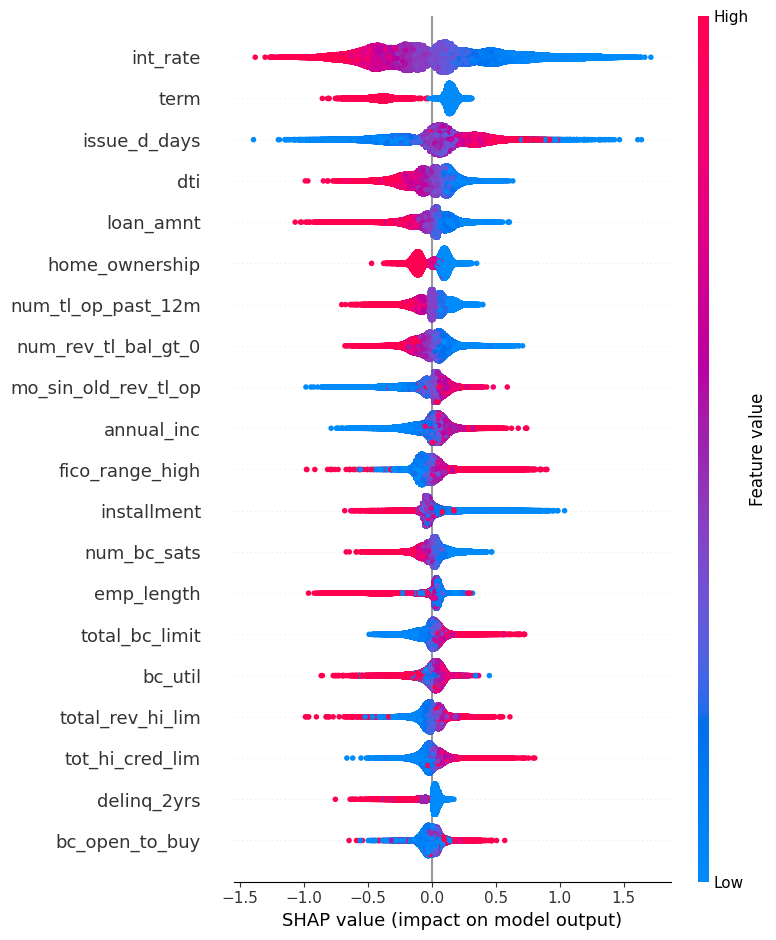

모델 학습 및 SHAP 값 계산이 완료되었습니다.


In [52]:
# 샘플링된 데이터에 대해 SHAP 값 계산을 tqdm를 통해 진행 상황 표시
explainer = shap.Explainer(model, X_sampled)

# tqdm을 사용하여 진행 상황 표시
shap_values = []
for i in tqdm(range(X_sampled.shape[0]), desc="Calculating SHAP values"):
    shap_value = explainer(X_sampled.iloc[i:i+1])
    shap_values.append(shap_value.values)

shap_values = np.array(shap_values).reshape(X_sampled.shape[0], -1)

# SHAP 값 요약 플롯 생성
shap.summary_plot(shap_values, X_sampled)


print("모델 학습 및 SHAP 값 계산이 완료되었습니다.")

# EDA


In [79]:
num_desc.to_csv('num_desc.csv', index = False)

In [43]:
df.head(300)

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,all_util,inq_fi,total_cu_tl,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,loan_status_N
0,5000,5000,36,0.1065,162.869995,10+ years,RENT,24000.000000,Verified,2011-12-01,credit_card,27.650000,0,1985-01-01,739,3,0,13648,0.8370,9,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
1,2500,2500,60,0.1527,59.830002,< 1 year,RENT,30000.000000,Source Verified,2011-12-01,car,1.000000,0,1999-04-01,744,3,0,1687,0.0940,4,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0
2,2400,2400,36,0.1596,84.330002,10+ years,RENT,12252.000000,Not Verified,2011-12-01,small_business,8.720000,0,2001-11-01,739,2,0,2956,0.9850,10,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
3,10000,10000,36,0.1349,339.309998,10+ years,RENT,49200.000000,Source Verified,2011-12-01,other,20.000000,0,1996-02-01,694,10,0,5598,0.2100,37,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
4,3000,3000,60,0.1269,67.790001,1 year,RENT,80000.000000,Source Verified,2011-12-01,other,17.940001,0,1996-01-01,699,15,0,27783,0.5390,38,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
5,5000,5000,36,0.0790,156.460007,3 years,RENT,36000.000000,Source Verified,2011-12-01,wedding,11.200000,0,2004-11-01,734,9,0,7963,0.2830,12,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
6,7000,7000,60,0.1596,170.080002,8 years,RENT,47004.000000,Not Verified,2011-12-01,debt_consolidation,23.510000,0,2005-07-01,694,7,0,17726,0.8560,11,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
7,3000,3000,36,0.1864,109.430000,9 years,RENT,48000.000000,Source Verified,2011-12-01,car,5.350000,0,2007-01-01,664,4,0,8221,0.8750,4,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,1
8,5600,5600,60,0.2128,152.389999,4 years,OWN,40000.000000,Source Verified,2011-12-01,small_business,5.550000,0,2004-04-01,679,11,0,5210,0.3260,13,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0
9,5375,5375,60,0.1269,121.449997,< 1 year,RENT,15000.000000,Verified,2011-12-01,other,18.080000,0,2004-09-01,729,2,0,9279,0.3650,3,f,-1,-1,-1,-1,-1.0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1,-1,-1,-1,-1,0,0,0,0,0


In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
df.groupby('loan_status_N')['pub_rec'].value_counts()

loan_status_N  pub_rec
0              0           294006
               1            57269
               2             6901
               3             2060
               4              780
               5              347
               6              183
               7               83
               8               38
               9               27
               10              14
               12              10
               11              10
               19               4
               16               3
               15               3
               14               3
               13               3
               22               1
               25               1
               17               1
               18               1
               21               1
               86               1
               61               1
               45               1
               44               1
               40               1
               28               1
1              0          1212753
               1           195126
               2            23500
               3             7306
               4             2646
               5             1291
               6              638
               7              294
               8              172
               9               91
               10              63
               11              44
               12              23
               13              19
               15               7
               14               7
               16               6
               21               5
               18               5
               17               4
               24               3
               28               3
               20               3
               19               3
               23               2
               22               2
               49               2
               37               1
               61               1
               31               1
               54               1
               47               1
               46               1
               32               1
               34               1
               52               1
               63               1
Name: count, dtype: Int64

In [75]:
problem = ['pub_rec','pub_rec_bankruptcies', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

In [76]:
df[problem].corr()

,pub_rec,pub_rec_bankruptcies,tax_liens,collections_12_mths_ex_med,chargeoff_within_12_mths
pub_rec,1.000000,0.647646,0.702697,0.011813,-0.004767
pub_rec_bankruptcies,0.647646,1.000000,0.033779,-0.001883,-0.009947
tax_liens,0.702697,0.033779,1.000000,0.011901,-0.000729
collections_12_mths_ex_med,0.011813,-0.001883,0.011901,1.000000,0.043909
chargeoff_within_12_mths,-0.004767,-0.009947,-0.000729,0.043909,1.000000


In [81]:
df['fico_range_high'].max()

850

In [88]:
df['pub_rec'].sort_values(ascending=False).head(200)

,pub_rec
1936386,86
1690930,63
2618533,61
2816024,61
132830,54
517592,52
2183719,49
71810,49
2479708,47
2305583,46


In [89]:
df[df['total_rev_hi_lim'] == 9999999]

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,all_util,inq_fi,total_cu_tl,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,loan_status_N
130027,28000,28000,36,0.0890,889.090027,1 year,MORTGAGE,1000000.0,Verified,2013-06-01,credit_card,12.54,0,1986-06-01,729,13,0,2568995,0.204,28,f,-1,-1,-1,8288,62.5,122,319,6,0,4,7,8,8,13,7,13,0,1,100.0,50.0,9999999,2644442,140200,17987,9999999,0,0,0,0,1
1556087,26200,26200,36,0.0769,817.280029,3 years,MORTGAGE,999999.0,Verified,2014-10-01,debt_consolidation,13.30,0,1986-02-01,724,16,0,2560703,0.163,31,f,-1,-1,-1,24284,39.5,137,334,6,0,6,9,10,10,14,7,16,0,3,100.0,50.0,9999999,2688920,147700,95987,9999999,0,0,0,0,1
2157211,35000,35000,36,0.1655,1240.030029,10+ years,OWN,400000.0,Verified,2015-06-01,moving,24.83,0,1996-09-01,744,9,1,2904836,0.374,17,f,-1,-1,-1,15109,37.0,111,200,3,0,3,3,7,6,7,5,9,0,2,100.0,0.0,9999999,2921551,24000,28655,9999999,0,0,0,0,1


In [90]:
df[df['tot_hi_cred_lim'] == 9999999]

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,all_util,inq_fi,total_cu_tl,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,loan_status_N
130027,28000,28000,36,0.0890,889.090027,1 year,MORTGAGE,1000000.0,Verified,2013-06-01,credit_card,12.540000,0,1986-06-01,729,13,0,2568995,0.204,28,f,-1,-1,-1,8288,62.500000,122,319,6,0,4,7,8,8,13,7,13,0,1,100.000000,50.0,9999999,2644442,140200,17987,9999999,0,0,0,0,1
248842,9600,9600,36,0.0944,307.250000,4 years,MORTGAGE,80000.0,Not Verified,2017-09-01,debt_consolidation,7.130000,0,2006-05-01,684,4,1,6040,0.929,6,w,86,3,0,460,92.900002,15,84,3,0,2,2,1,2,2,2,4,0,0,100.000000,100.0,9999999,17105,6500,13499,6500,0,0,1,0,1
416619,10000,10000,36,0.0672,307.500000,10+ years,MORTGAGE,65000.0,Source Verified,2017-11-01,debt_consolidation,19.959999,0,1995-08-01,704,22,1,7842,0.214,60,w,52,3,4,10169,33.500000,137,267,5,0,5,13,17,18,38,9,22,0,4,100.000000,0.0,9999999,43708,15300,47424,36600,0,0,1,0,1
890778,25000,25000,36,0.2089,940.469971,10+ years,MORTGAGE,150000.0,Source Verified,2018-11-01,credit_card,27.480000,1,1995-09-01,714,10,0,181348,0.494,27,w,59,0,0,26119,52.900002,200,277,2,0,5,14,8,7,16,6,10,0,2,96.300003,40.0,9999999,231317,55500,27580,234500,0,0,0,0,1
1556087,26200,26200,36,0.0769,817.280029,3 years,MORTGAGE,999999.0,Verified,2014-10-01,debt_consolidation,13.300000,0,1986-02-01,724,16,0,2560703,0.163,31,f,-1,-1,-1,24284,39.500000,137,334,6,0,6,9,10,10,14,7,16,0,3,100.000000,50.0,9999999,2688920,147700,95987,9999999,0,0,0,0,1
1563348,34000,34000,36,0.1899,1246.140015,10+ years,MORTGAGE,80000.0,Verified,2014-09-01,medical,17.719999,5,1995-11-01,714,21,0,23270,0.367,37,f,-1,-1,-1,29173,31.400000,147,226,3,3,11,17,5,17,28,9,20,3,3,83.800003,9.1,9999999,51847,42500,28577,63400,0,0,0,0,1
1950227,5125,5125,36,0.1399,175.139999,Unemployed,MORTGAGE,50000.0,Verified,2015-10-01,debt_consolidation,3.360000,0,1999-03-01,679,5,0,1707,0.232,15,w,-1,-1,-1,-1,-1.000000,199,111,2,2,0,3,3,4,9,4,5,0,3,53.799999,-1.0,9999999,1707,0,0,7357,0,0,0,0,0
2157211,35000,35000,36,0.1655,1240.030029,10+ years,OWN,400000.0,Verified,2015-06-01,moving,24.830000,0,1996-09-01,744,9,1,2904836,0.374,17,f,-1,-1,-1,15109,37.000000,111,200,3,0,3,3,7,6,7,5,9,0,2,100.000000,0.0,9999999,2921551,24000,28655,9999999,0,0,0,0,1
2180168,10000,10000,36,0.0668,307.309998,4 years,MORTGAGE,75000.0,Not Verified,2015-04-01,debt_consolidation,15.020000,2,1988-09-01,684,15,0,9164,0.530,37,w,-1,-1,-1,3898,57.200001,199,319,6,4,5,13,6,13,25,10,15,0,2,64.900002,40.0,9999999,13265,9100,12981,17300,0,0,0,0,1
2328492,25000,25000,36,0.0532,752.869995,10+ years,MORTGAGE,80000.0,Source Verified,2016-03-01,credit_card,13.050000,0,1996-11-01,739,14,0,23090,0.447,30,w,36,0,1,13366,58.700001,123,232,4,2,7,11,6,12,20,8,14,0,3,93.300003,28.6,9999999,23767,32400,14000,51600,0,0,0,0,1
